# Visualization 데이터 시각화 리포트

## 주제
- 축구를 하는데 있어서 키가 큰 영향을 줄까?
     - 신장이 클수록 유리할 것이다.

### 데이터 출처
- 캐글 : https://www.kaggle.com/datasets/sdelquin/laliga-data3

### 데이터 칼럼 정보

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

In [2]:
url = "https://raw.githubusercontent.com/sdelquin/laliga-data/main/datasets/col-specs.csv"
df_info = pd.read_csv(url)
pd.set_option('display.max_rows', None)    
df_info

Column     Category  \
0                                           country     Personal   
1                                     date_of_birth     Personal   
2                                         firstname     Personal   
3                                            gender     Personal   
4                                            height     Personal   
5                                                id     Personal   
6                                         instagram     Personal   
7                                     international     Personal   
8                                          lastname     Personal   
9                                              name     Personal   
10                                         nickname     Personal   
11                                            photo     Personal   
12                                   place_of_birth     Personal   
13                                       player.url     Personal   
14                                         position     Personal   
15                                     shirt_number     Personal   
16                                             slug     Personal   
17                                          stadium     Personal   
18                                    stadium.image     Personal   
19                                             team     Personal   
20                                  team.foundation     Personal   
21                                      team.shield     Personal   
22                                   team.shortname     Personal   
23                                          twitter     Personal   
24                                           weight     Personal   
25                                      appearances     Classics   
26                                      competition     Classics   
27                                     games_played     Classics   
28                                            goals     Classics   
29                                            index     Classics   
30                                    penalty_goals     Classics   
31                                       recoveries     Classics   
32                                           starts     Classics   
33                                   substitute_off     Classics   
34                                    substitute_on     Classics   
35                                team_games_played     Classics   
36                                      time_played     Classics   
37                                     total_passes     Classics   
38                                      total_shots     Classics   
39                                          touches     Classics   
40                                     aerial_duels  Deffensives   
41                                aerial_duels_lost  Deffensives   
42                                 aerial_duels_won  Deffensives   
43                         attempts_from_set_pieces  Deffensives   
44                                  backward_passes  Deffensives   
45                                    blocked_shots  Deffensives   
46                                           blocks  Deffensives   
47                                          catches  Deffensives   
48                                     clean_sheets  Deffensives   
49                          clearances_off_the_line  Deffensives   
50                                            drops  Deffensives   
51                                            duels  Deffensives   
52                                       duels_lost  Deffensives   
53                                        duels_won  Deffensives   
54                                      fifty_fifty  Deffensives   
55                       gk_successful_distribution  Deffensives   
56                     gk_unsuccessful_distribution  Deffensives   
57                               goalkeeper_smother  Deffensives   
58                               

## 가설

### Forward
- 가설 1 : 키가 큰 공격수들이 대체로 공격퍼포먼스가 더 좋을 것이다.
    - 가설 1-1 : 키가 클수록 헤딩골의 수가 높을 것이다.
    - 가설 1-2 : 키가 작을수록 파울을 더 많이 당할 것이다.

### Midfielder
가설 2 : 키가 작은 선수들은 창의성이 높을 것이고, 키가 큰 선수들은 수비적인 스탯이 더 좋을 것이다.

### Defender
- 가설 3 : 수비수는 키가 큰 그룹이 더 뛰어난 선수가 많을 것이다. 
    - 가설 3-1 : 수비수는 키가 클 수록 공중볼 경합 및 태클성공률이 높을 것이다.
    - 가설 3-2 : 파울빈도가 높을수록 수비능력은 좋지 않을 것이다.

### Goalkeeper
- 가설 4 : 골키퍼는 키가 큰 선수들이 더 좋은 활약을 펼칠 것이다.

### ETC
- 가설 5 : 평균 신장이 높은 팀이 세트피스에서 더 강한 모습을 보일 것이다.
- 가설 6 : 평균 신장이 높은 팀이 순위가 더 높을 것이다.
- 가설 7 : 평균 연령이 낮은 팀이 순위가 더 높을 것이다.
- 가설 8 : 좋은걸 많이 먹고 크는 요즘 선수들이 더 키가 클 것이다. (번외)

### 결론

---

In [4]:
# 데이터 불러오기
file_url = 'S2324-laliga-players.csv'
df = pd.read_csv(file_url, parse_dates=['date_of_birth'])
pd.set_option('display.max_rows', 20) 
df.head()

competition                                         player.url     id  \
0    Classics          https://www.laliga.com/en-ES/player/aaron   1307   
1    Classics  https://www.laliga.com/en-ES/player/abdessamad...  13770   
2    Classics  https://www.laliga.com/en-ES/player/abderrahma...  27754   
3    Classics          https://www.laliga.com/en-ES/player/abqar   8715   
4    Classics    https://www.laliga.com/en-ES/player/abdul-mumin  27064   

                    slug             name    nickname firstname    lastname  \
0                  aaron  Aarón Escandell       Aarón     Aarón   Escandell   
1  abdessamad-ezzalzouli  Abde Ezzalzouli     Ez Abde      Abde  Ezzalzouli   
2    abderrahman-rebbach     Abde Rebbach  A. Rebbach      Abde     Rebbach   
3                  abqar      Abdel Abqar    A. Abqar     Abdel       Abqar   
4            abdul-mumin      Abdul Mumin    A. Mumin     Abdul       Mumin   

  gender             date_of_birth  ... unsuccessful_crosses_open_play  \
0   male 1995-09-27 00:00:00+00:00  ...                            NaN   
1   male 2001-12-17 00:00:00+00:00  ...                           21.0   
2   male 1998-08-11 00:00:00+00:00  ...                           27.0   
3   male 1999-03-10 00:00:00+00:00  ...                            NaN   
4   male 1998-06-06 00:00:00+00:00  ...                            NaN   

   unsuccessful_dribbles  unsuccessful_launches  unsuccessful_layoffs  \
0                    NaN                    NaN                   NaN   
1                   12.0                    2.0                   1.0   
2                    9.0                    2.0                   2.0   
3                    NaN                   16.0                   NaN   
4                    1.0                   25.0                   NaN   

  unsuccessful_long_passes unsuccessful_passes_opposition_half  \
0                      NaN                                 NaN   
1                      5.0                                51.0   
2                      6.0                                59.0   
3                     65.0                                79.0   
4                     44.0                                51.0   

  unsuccessful_passes_own_half unsuccessful_short_passes winning_goal  \
0                          NaN                       NaN          NaN   
1                         11.0                      34.0          NaN   
2                         10.0                      27.0          1.0   
3                         26.0                      40.0          0.0   
4                         18.0                      25.0          0.0   

  yellow_cards  
0          NaN  
1          NaN  
2          NaN  
3          5.0  
4          1.0  

[5 rows x 150 columns]

## 데이터 전처리

In [6]:
pd.set_option('display.max_rows', 20)    

df = df.drop(columns=['player.url', 'gender', 'team.shield', 'photo', 'stadium.image']) # 필요없는 칼럼 제외
df = df[df['competition'] == 'Classics'] 
df = df.drop(columns=['competition']) # 중복되는 데이터 제외
df = df.dropna(subset=['team']) # 소속팀이 없는 이적생 제외

team_counts = df.groupby('team')['name'].count().reset_index(name='count') # 소속팀이 다른 리그인 임대생 제외
teams_to_remove = team_counts[team_counts['count'] <= 5]['team']
df = df[~df['team'].isin(teams_to_remove)]

KeyError: "['player.url' 'gender' 'team.shield' 'photo' 'stadium.image'] not found in axis"

## 데이터 기초정보

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 632
Columns: 144 entries, id to yellow_cards
dtypes: bool(1), datetime64[ns, UTC](1), float64(127), int64(1), object(14)
memory usage: 671.1+ KB


In [6]:
df.head()

id                   slug             name    nickname firstname  \
0   1307                  aaron  Aarón Escandell       Aarón     Aarón   
1  13770  abdessamad-ezzalzouli  Abde Ezzalzouli     Ez Abde      Abde   
2  27754    abderrahman-rebbach     Abde Rebbach  A. Rebbach      Abde   
3   8715                  abqar      Abdel Abqar    A. Abqar     Abdel   
4  27064            abdul-mumin      Abdul Mumin    A. Mumin     Abdul   

     lastname             date_of_birth place_of_birth  weight  height  ...  \
0   Escandell 1995-09-27 00:00:00+00:00     Carcagente    71.0   185.0  ...   
1  Ezzalzouli 2001-12-17 00:00:00+00:00     Beni Melal    72.0   177.0  ...   
2     Rebbach 1998-08-11 00:00:00+00:00          Bilda     NaN   176.0  ...   
3       Abqar 1999-03-10 00:00:00+00:00         Settat    80.0   188.0  ...   
4       Mumin 1998-06-06 00:00:00+00:00          Accra    79.0   188.0  ...   

   unsuccessful_crosses_open_play unsuccessful_dribbles unsuccessful_launches  \
0                             NaN                   NaN                   NaN   
1                            21.0                  12.0                   2.0   
2                            27.0                   9.0                   2.0   
3                             NaN                   NaN                  16.0   
4                             NaN                   1.0                  25.0   

  unsuccessful_layoffs unsuccessful_long_passes  \
0                  NaN                      NaN   
1                  1.0                      5.0   
2                  2.0                      6.0   
3                  NaN                     65.0   
4                  NaN                     44.0   

  unsuccessful_passes_opposition_half unsuccessful_passes_own_half  \
0                                 NaN                          NaN   
1                                51.0                         11.0   
2                                59.0                         10.0   
3                                79.0                         26.0   
4                                51.0                         18.0   

   unsuccessful_short_passes winning_goal yellow_cards  
0                        NaN          NaN          NaN  
1                       34.0          NaN          NaN  
2                       27.0          1.0          NaN  
3                       40.0          0.0          5.0  
4                       25.0          0.0          1.0  

[5 rows x 144 columns]

# 라리가 선수들 키 분포

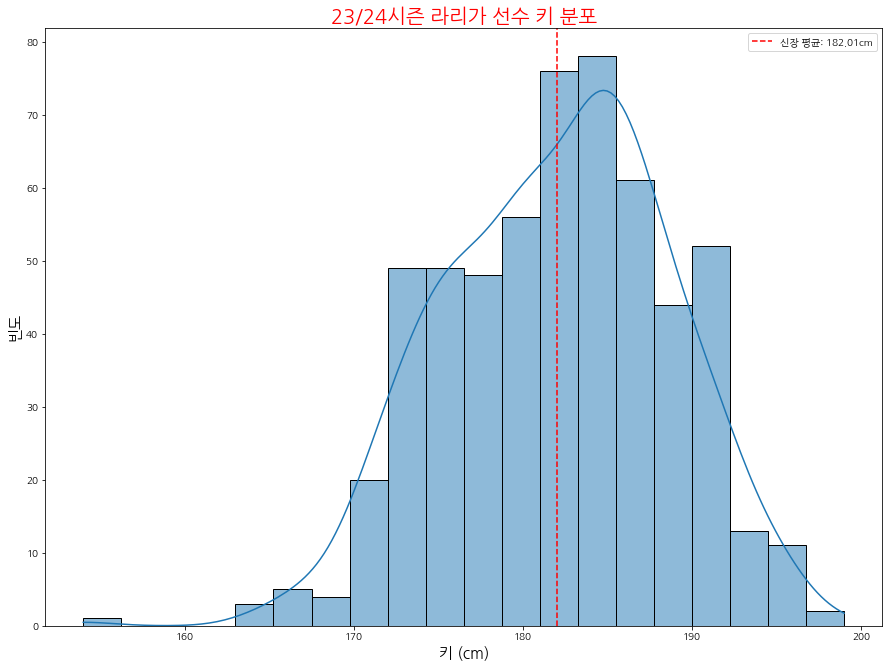

In [7]:
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Nanum Gothic'

plt.figure(figsize=(15, 11))
sns.histplot(data=df, x='height', bins=20, kde=True)
plt.xlabel('키 (cm)', fontsize = 15)
plt.ylabel('빈도', fontsize = 15)
plt.title('23/24시즌 라리가 선수 키 분포', fontsize = 20, color='red')

mean_height = df["height"].mean()
plt.axvline(x=mean_height, color='r', linestyle='--', label=f'신장 평균: {mean_height:.2f}cm')

plt.legend()

plt.show()

# Forward
## 가설 1 : 키가 큰 공격수들이 대체로 공격퍼포먼스가 더 좋을 것이다.
    - time_played
    - goals
    - time_per_goals(추가)
    - goal_assists
    - time_per_goal_assists(추가)
    - total_shots
    - shots_on_target_inc_goals
    - shots_accuracy(추가)
    
    - affensive_scores 
        - time_per_goals
        - time_per_goal_assists
        - shots_accuracy

In [8]:
# 피처 추가
df['time_per_goals'] = (df['goals'] / df['time_played']).map(lambda x: x * 90)
df['time_per_goal_assists'] = (df['goal_assists'] / df['time_played']).map(lambda x: x * 90)
df['shots_accuracy'] = df['shots_on_target_inc_goals'] / df['total_shots']

# 그룹 나누기
Small = df[(df['height'] <= 182) & (df['position'] == 'Forward')]
Tall = df[(df['height'] > 182) & (df['position'] == 'Forward')]

# 90분미만으로 뛴 선수는 데이터분석에서 제외
Small_grouped_filtered = Small[Small['time_played'] >= 90]
Tall_grouped_filtered = Tall[Tall['time_played'] >= 90]

combined_grouped = pd.concat([Tall_grouped_filtered, Small_grouped_filtered], keys=['Tall', 'Small']).reset_index()
combined_grouped = combined_grouped.drop(columns=['level_1'])
combined_grouped = combined_grouped.rename(columns={'level_0': 'group'})
combined_grouped.head()

group     id               slug                           name     nickname  \
0  Tall  12902  alexander-sorloth              Alexander Sørloth      Sørloth   
1  Tall   1809          a-pedraza                Alfonso Pedraza   A. Pedraza   
2  Tall   3907        andre-silva  André Miguel Valente da Silva  André Silva   
3  Tall   9656            budimir                   Ante Budimir      Budimir   
4  Tall  18967       artem-dovbyk                   Artem Dovbyk       Dovbyk   

      firstname          lastname             date_of_birth  \
0     Alexander           Sørloth 1995-12-05 00:00:00+00:00   
1       Alfonso           Pedraza 1996-04-09 00:00:00+00:00   
2  André Miguel  Valente da Silva 1995-11-06 00:00:00+00:00   
3          Ante           Budimir 1991-07-22 00:00:00+00:00   
4         Artem            Dovbyk 1997-06-21 00:00:00+00:00   

                     place_of_birth  weight  ...  unsuccessful_layoffs  \
0                         Trondheim    90.0  ...                   2.0   
1  San Sebastián de los Ballesteros    73.0  ...                   NaN   
2                          Gondomar    84.0  ...                   NaN   
3                            Zenica    75.0  ...                   1.0   
4                               NaN    76.0  ...                   5.0   

   unsuccessful_long_passes unsuccessful_passes_opposition_half  \
0                       1.0                                46.0   
1                      25.0                                78.0   
2                       NaN                                 3.0   
3                       NaN                                87.0   
4                       NaN                                28.0   

  unsuccessful_passes_own_half unsuccessful_short_passes winning_goal  \
0                          7.0                      49.0          2.0   
1                         28.0                      46.0          0.0   
2                          1.0                       4.0          0.0   
3                          9.0                      93.0          1.0   
4                         18.0                      46.0          2.0   

  yellow_cards time_per_goals  time_per_goal_assists shots_accuracy  
0          1.0       0.477876               0.159292       0.571429  
1          4.0       0.100671               0.201342       0.600000  
2          NaN            NaN                    NaN       1.000000  
3          4.0       0.547529               0.136882       0.612903  
4          1.0       0.944656               0.343511       0.512821  

[5 rows x 148 columns]

In [9]:
group_counts = combined_grouped['group'].value_counts().reset_index()

group_counts.columns = ['Group', 'Count']

colors = ['gold', 'lightgreen']

fig = px.pie(group_counts, values='Count', names='Group', title='<공격수들의 그룹간 비율>',
              color_discrete_sequence=colors, hole=0.3)


fig.update_traces(textinfo='percent+label', textfont_size=25)
fig.update_traces(pull=[0.1, 0, 0, 0])
fig.update_layout(title_font_size=22, title_x=0.5)
fig.update_layout(paper_bgcolor='lightgrey')

fig.show()

## 공격포인트, 슈팅 지표 비교

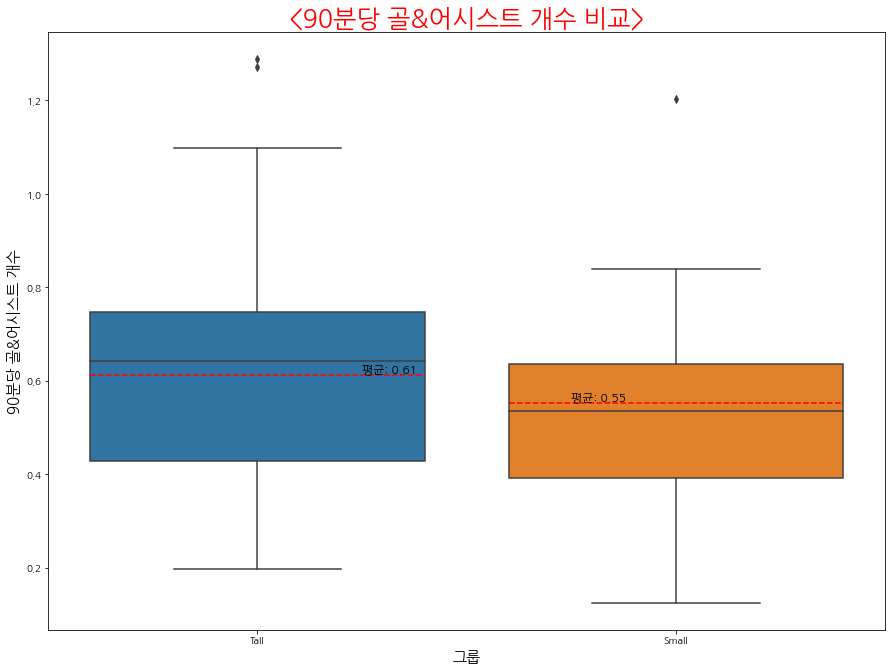

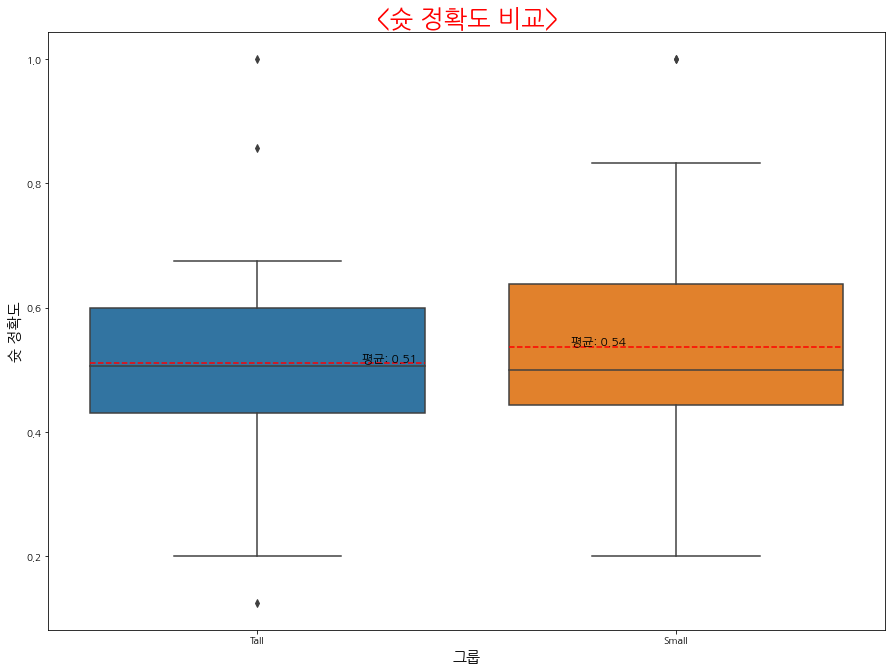

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.rcParams['font.family'] = 'Nanum Gothic'

# 피처 추가
combined_grouped["time_per_goals_and_assists"] = combined_grouped["time_per_goals"] + combined_grouped["time_per_goal_assists"]

# 분석에 필요한 평균값 구하기
small_mean_time_per_goals_assists = Small_grouped_filtered["time_per_goals"].mean() + Small_grouped_filtered["time_per_goal_assists"].mean()
tall_mean_time_per_goals_assists = Tall_grouped_filtered["time_per_goals"].mean() + Tall_grouped_filtered["time_per_goal_assists"].mean()
small_mean_shots_accuracy = Small_grouped_filtered["shots_accuracy"].mean()
tall_mean_shots_accuracy = Tall_grouped_filtered["shots_accuracy"].mean()

# 첫번째 박스플롯
plt.figure(figsize=(15, 11))
sns.boxplot(x='group', y='time_per_goals_and_assists', data=combined_grouped)
plt.title('<90분당 골&어시스트 개수 비교>', fontsize=25, color='red')
plt.xlabel('그룹', fontsize=15)
plt.ylabel('90분당 골&어시스트 개수', fontsize=15)

plt.axhline(tall_mean_time_per_goals_assists, color='red', linestyle='--', xmin=0.05, xmax=0.45)
plt.axhline(small_mean_time_per_goals_assists, color='red', linestyle='--', xmin=0.55, xmax=0.95)

plt.text(0.25, tall_mean_time_per_goals_assists, f'평균: {tall_mean_time_per_goals_assists:.2f}', verticalalignment='bottom', color='black', fontsize=12)
plt.text(0.75, small_mean_time_per_goals_assists, f'평균: {small_mean_time_per_goals_assists:.2f}', verticalalignment='bottom', color='black', fontsize=12)

# 두번째 박스플롯
plt.figure(figsize=(15, 11))
sns.boxplot(x='group', y='shots_accuracy', data=combined_grouped)
plt.title('<슛 정확도 비교>', fontsize=25, color='red')
plt.xlabel('그룹', fontsize=15)
plt.ylabel('슛 정확도', fontsize=15)

plt.axhline(tall_mean_shots_accuracy, color='red', linestyle='--', xmin=0.05, xmax=0.45)
plt.axhline(small_mean_shots_accuracy, color='red', linestyle='--', xmin=0.55, xmax=0.95)

plt.text(0.25, tall_mean_shots_accuracy, f'평균: {tall_mean_shots_accuracy:.2f}', verticalalignment='bottom', color='black', fontsize=12)
plt.text(0.75, small_mean_shots_accuracy, f'평균: {small_mean_shots_accuracy:.2f}', verticalalignment='bottom', color='black', fontsize=12)

plt.show()

# 공격퍼포먼스 수치 비교

In [11]:
from sklearn.preprocessing import MinMaxScaler

# 스케일 통일
scaler = MinMaxScaler()

columns_to_scale = ['time_per_goals', 'time_per_goal_assists', 'shots_accuracy']
combined_grouped[columns_to_scale] = scaler.fit_transform(combined_grouped[columns_to_scale])
combined_grouped['affensive_score'] = combined_grouped['time_per_goals'] + combined_grouped['time_per_goal_assists'] + combined_grouped['shots_accuracy']

affensive_scores_df = combined_grouped[['name', 'group', 'affensive_score']]
affensive_scores_df = affensive_scores_df.sort_values(by='affensive_score', ascending=False)

affensive_scores_df.head(10)

name  group  affensive_score
82  Raphael Dias Belloli  Small         1.927508
11      Cristhian Stuani   Tall         1.881156
4           Artem Dovbyk   Tall         1.840635
42           Abdón Prats  Small         1.555195
51         Borja Mayoral  Small         1.521627
29    Robert Lewandowski   Tall         1.415556
5       Asier Villalibre   Tall         1.394272
72         Lucas Vázquez  Small         1.368433
49     Antoine Griezmann  Small         1.362814
98          Ángel Correa  Small         1.360015

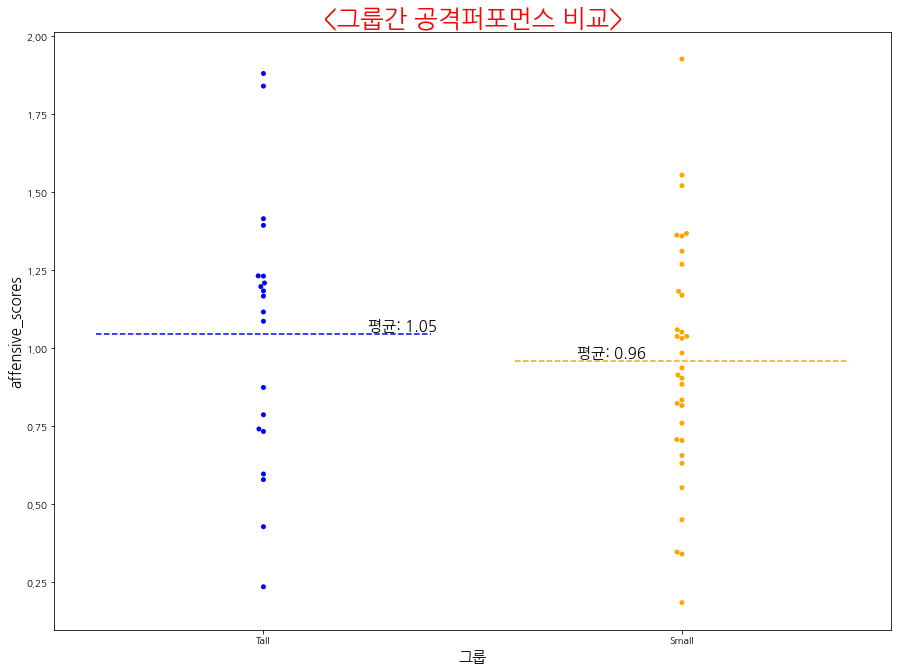

In [12]:
plt.figure(figsize=(15, 11))
sns.swarmplot(x='group', y='affensive_score', data=affensive_scores_df, 
              order=['Tall', 'Small'], palette={'Tall': 'blue', 'Small': 'orange'})

plt.title('<그룹간 공격퍼포먼스 비교>', fontsize=25, color='red')
plt.xlabel('그룹', fontsize=15)
plt.ylabel('affensive_scores', fontsize=15)

# 평균값 계산
small_mean = affensive_scores_df[affensive_scores_df['group'] == 'Small']['affensive_score'].mean()
tall_mean = affensive_scores_df[affensive_scores_df['group'] == 'Tall']['affensive_score'].mean()

# 평균값 표시
plt.axhline(small_mean, color='orange', linestyle='--', xmin=0.55, xmax=0.95)
plt.axhline(tall_mean, color='blue', linestyle='--', xmin=0.05, xmax=0.45)
plt.text(0.75, small_mean, f'평균: {small_mean:.2f}', verticalalignment='bottom', fontsize=15, color='black')
plt.text(0.25, tall_mean, f'평균: {tall_mean:.2f}', verticalalignment='bottom', fontsize=15, color='black')

plt.show()

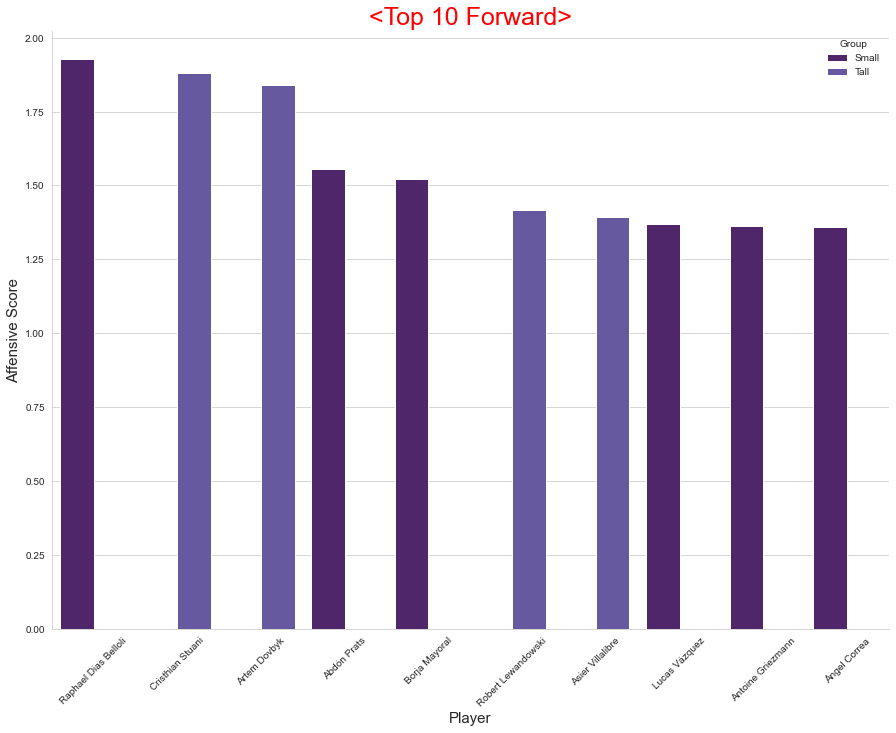

In [13]:
top10_affensive_scores = affensive_scores_df.sort_values(by='affensive_score', ascending=False).head(10)
plt.rcParams['font.family'] = 'Arial'

sns.set_style("whitegrid")
palette = sns.color_palette("twilight_shifted", len(top10_affensive_scores))

plt.figure(figsize=(15, 11))
barplot = sns.barplot(x='name', y='affensive_score', hue='group', data=top10_affensive_scores, palette=palette)

plt.legend(title='Group', loc='upper right', frameon=False)

plt.title('<Top 10 Forward>', fontsize=25, color='red')
plt.xlabel('Player', fontsize=15)
plt.ylabel('Affensive Score', fontsize=15)

plt.xticks(rotation=45)
sns.despine()

plt.show()

### Rapinha (14경기 3골 5어시스트) - FC 바르셀로나
#### Group Small
#### Score : 1.927508
![df](./image/rap.webp)

## 가설 1-1 : 키가 큰 선수일수록 헤딩골의 수가 많을 것이다.

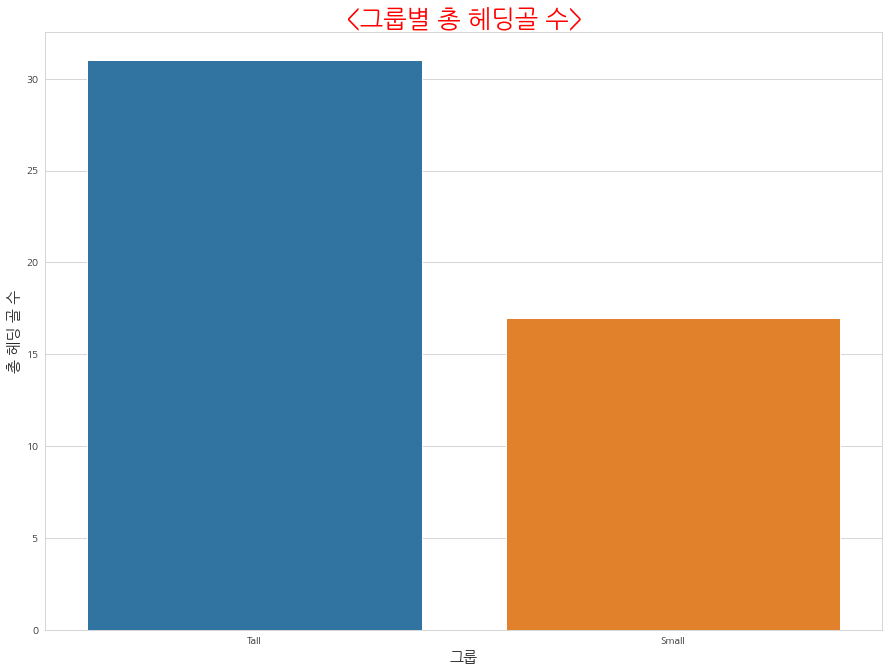

In [14]:
plt.rcParams['font.family'] = 'Nanum Gothic'

plt.figure(figsize=(15, 11))
sns.barplot(x='group', y='headed_goals', data=combined_grouped, estimator=sum, ci=None)

plt.title('<그룹별 총 헤딩골 수>', fontsize=25, color = "red")
plt.xlabel('그룹', fontsize=15)
plt.ylabel('총 헤딩 골 수', fontsize=15)

plt.show()

## 가설 1-2 : 키가 작을수록 파울을 더 많이 당할 것이다.

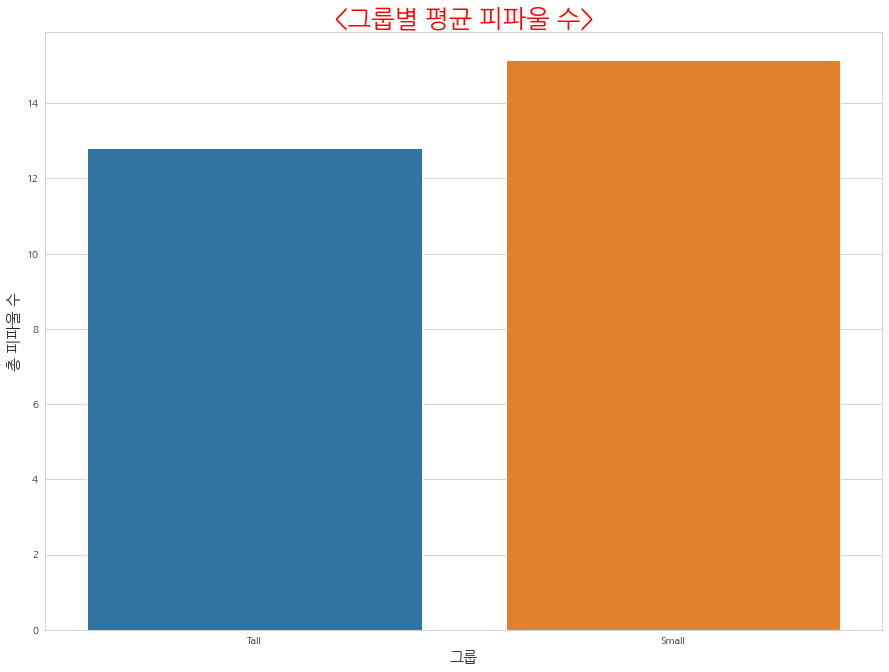

In [15]:
plt.rcParams['font.family'] = 'Nanum Gothic'

plt.figure(figsize=(15, 11))
sns.barplot(x='group', y='total_fouls_won', data=combined_grouped, estimator=np.mean, ci=None)

plt.title('<그룹별 평균 피파울 수>', fontsize=25, color = "red")
plt.xlabel('그룹', fontsize=15)
plt.ylabel('총 피파울 수', fontsize=15)

plt.show()

# Midfielder
## 가설 2 : 키가 작은 미드필더들은 플레이메이커 기질이 높을 것이고, 키가 큰 선수들은 수비적인 스탯이 더 좋을 것이다.

## 트랜스퍼마켓 기준 전세계 가치가 높은 수비형 미드필더 TOP10
- 평균 키 :184.7cm

![수미가치사진](./image/top_defensive_mid.png)

## IFFHS에서 발표한 올해 세계 최고의 플레이메이커 TOP10
- 평균 키 : 179.2cm
- 최다 수상자인 메시(170cm) 그 뒤 사비(169cm)나 모드리치(172cm)

![iffhs](./image/playmaker.png)

## 유서 깊은 축구계 'GOAT' 난쟁이 3인방
- 펠레(173cm) , 메시(170cm) , 마라도나(165cm)

![올타임](./image/mepema.jpeg)

In [16]:
# 피처 추가

df['pass_success_rate'] = df['total_successful_passes_excl_crosses_corners'] / df['total_passes'] # 패스성공률
df['time_per_second_goal_assists'] = (df['second_goal_assists'] / df['time_played']).map(lambda x: x * 90)
df['time_per_key_passes_attempt_assists'] = (df['key_passes_attempt_assists'] / df['time_played']).map(lambda x: x * 90)
df['time_per_forward_passes'] = (df['forward_passes'] / df['time_played']).map(lambda x: x * 90)
df['time_per_through_balls'] = (df['through_balls'] / df['time_played']).map(lambda x: x * 90)

## 플레이메이킹능력 분석
- time_per_goal_assists
- time_per_second_goal_assists
- time_per_key_passes_attempt_assists
- time_per_forward_passes
- time_per_through_balls
- pass_success_rate(추가)

In [8]:
from sklearn.preprocessing import MinMaxScaler

Small = df[(df['height'] <= 182) & (df['position'] == 'Midfielder')]
Tall = df[(df['height'] > 182) & (df['position'] == 'Midfielder')]

Small_grouped_filtered = Small[Small['time_played'] >= 90]
Tall_grouped_filtered = Tall[Tall['time_played'] >= 90]

combined_grouped = pd.concat([Tall_grouped_filtered, Small_grouped_filtered], keys=['Tall', 'Small']).reset_index()

columns_to_scale = ['time_per_goal_assists', 
                    'time_per_second_goal_assists', 
                    'time_per_key_passes_attempt_assists', 
                    'time_per_forward_passes', 
                    'time_per_through_balls', 
                    'pass_success_rate']

names = combined_grouped['name']
groups = combined_grouped['level_0']

selected_df = combined_grouped[columns_to_scale]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_df)

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['total_score'] = scaled_df.sum(axis=1)
scaled_df['name'] = names
scaled_df['group'] = groups

sorted_df = scaled_df.sort_values(by='total_score', ascending=False)

column_order = ['group', 'name'] + [col for col in sorted_df.columns if col not in ['group', 'name']]
sorted_df = sorted_df[column_order]

sorted_df.head()

KeyError: "None of [Index(['time_per_goal_assists', 'time_per_second_goal_assists',\n       'time_per_key_passes_attempt_assists', 'time_per_forward_passes',\n       'time_per_through_balls', 'pass_success_rate'],\n      dtype='object')] are in the [columns]"

In [18]:
group_counts = sorted_df['group'].value_counts().reset_index()
group_counts.columns = ['Group', 'Count']

colors = ['gold', 'lightgreen']

fig = px.pie(group_counts, values='Count', names='Group', title='<미드필더들의 그룹간 비율>',
             color_discrete_sequence=colors, hole=0.3)

fig.update_traces(textinfo='percent+label', textfont_size=25)
fig.update_traces(pull=[0.1, 0, 0, 0])
fig.update_layout(title_font_size=22, title_x=0.5)
fig.update_layout(paper_bgcolor='lightgrey')

fig.show()

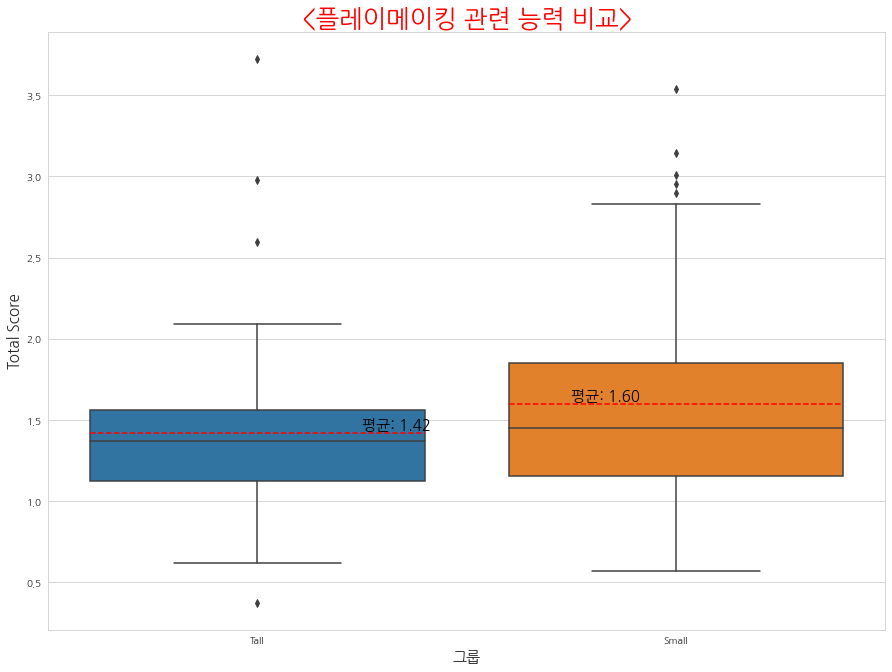

In [19]:
plt.rcParams['font.family'] = 'Nanum Gothic'

plt.figure(figsize=(15, 11))
sns.boxplot(x='group', y='total_score', data=sorted_df)
plt.title('<플레이메이킹 관련 능력 비교>', fontsize="25", color='red')
plt.xlabel('그룹', fontsize="15")
plt.ylabel('Total Score', fontsize="15")

small_mean = sorted_df[sorted_df['group'] == 'Small']['total_score'].mean()
tall_mean = sorted_df[sorted_df['group'] == 'Tall']['total_score'].mean()

plt.axhline(small_mean, color='red', linestyle='--', xmin=0.55, xmax=0.95)
plt.axhline(tall_mean, color='red', linestyle='--', xmin=0.05, xmax=0.45)

plt.text(0.25, tall_mean, f'평균: {tall_mean:.2f}', verticalalignment='bottom', fontsize=15, color='black')
plt.text(0.75, small_mean, f'평균: {small_mean:.2f}', verticalalignment='bottom', fontsize=15, color='black')

plt.show()

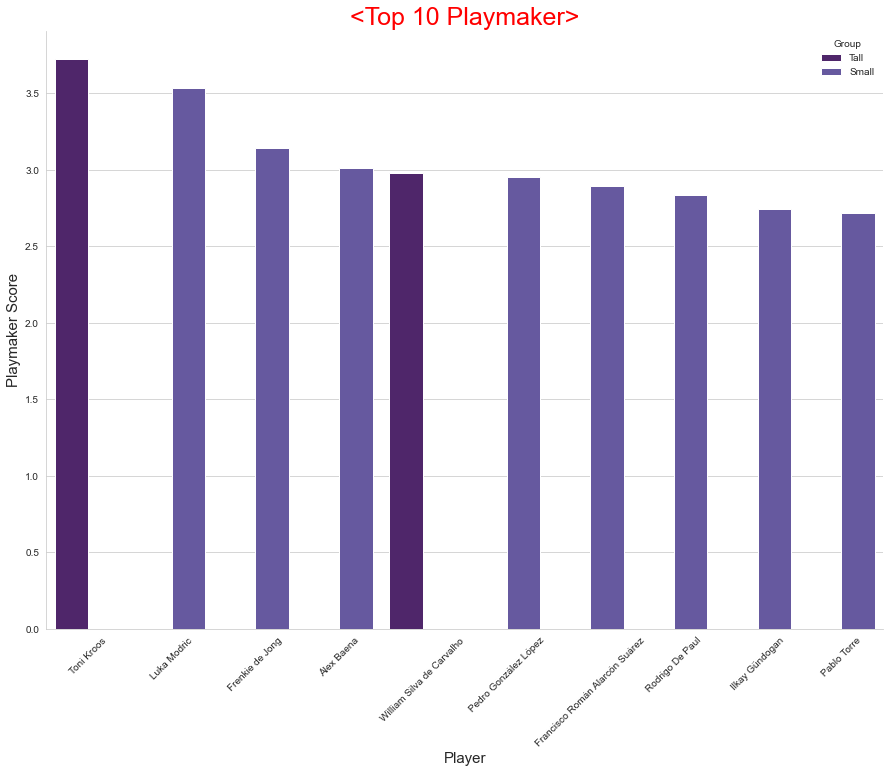

In [20]:
top10_playmaker_scores = sorted_df.sort_values(by='total_score', ascending=False).head(10)
plt.rcParams['font.family'] = 'Arial'

sns.set_style("whitegrid")
palette = sns.color_palette("twilight_shifted", len(top10_playmaker_scores))

plt.figure(figsize=(15, 11))
barplot = sns.barplot(x='name', y='total_score', hue='group', data=top10_playmaker_scores, palette=palette)

plt.legend(title='Group', loc='upper right', frameon=False)

plt.title('<Top 10 Playmaker>', fontsize=25, color='red')
plt.xlabel('Player', fontsize=15)
plt.ylabel('Playmaker Score', fontsize=15)

plt.xticks(rotation=45)
sns.despine()

plt.show()

### 토니 크로스 (19경기 1골 6어시스트) - 레알 마드리드
#### Group : Tall
#### Score : 3.723642
![asdf](./image/kroos.jpeg)

## 미드필더들의 수비적인 스탯 비교
- time_per_total_clearances(추가)
- time_per_interceptions(추가)
- tackles_success_rate(추가)
- aerial_duels_rate(추가)
- ground_duels_rate(추가)
- time_per_recoveries(추가)
- time_per_blocks(추가)

In [21]:
# 피처 추가

df['time_per_total_clearances'] = (df['total_clearances'] / df['time_played']).map(lambda x: x * 90) # 90분당 클리어 횟수
df['time_per_interceptions'] = (df['interceptions'] / df['time_played']).map(lambda x: x * 90) # 90분당 인터셉트 횟수
df['tackles_success_rate'] = df['tackles_won'] / df['total_tackles'] # 태클성공률
df['aerial_duels_rate'] = df['aerial_duels_won'] / df['aerial_duels'] # 공중볼경합성공률
df['ground_duels_rate'] = df['ground_duels_won'] / df['ground_duels'] # 지상볼경합성공률
df['time_per_recoveries'] = (df['recoveries'] / df['time_played']).map(lambda x: x * 90) # 90분당 리커버리 횟수
df['time_per_blocks'] = (df['blocks'] / df['time_played']).map(lambda x: x * 90) # 90분당 차단 횟수

In [22]:
from sklearn.preprocessing import MinMaxScaler

Small = df[(df['height'] <= 182) & (df['position'] == 'Midfielder')]
Tall = df[(df['height'] > 182) & (df['position'] == 'Midfielder')]

Small_grouped_filtered = Small[Small['time_played'] >= 90]
Tall_grouped_filtered = Tall[Tall['time_played'] >= 90]

combined_grouped = pd.concat([Tall_grouped_filtered, Small_grouped_filtered], keys=['Tall', 'Small']).reset_index()

columns_to_scale = ['time_per_total_clearances', 
                    'time_per_interceptions', 
                    'tackles_success_rate', 
                    'aerial_duels_rate', 
                    'ground_duels_rate', 
                    'time_per_recoveries',
                    'time_per_blocks',
                   'pass_success_rate']

names = combined_grouped['name']
groups = combined_grouped['level_0']

selected_df = combined_grouped[columns_to_scale]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_df)

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['total_score'] = scaled_df.sum(axis=1)
scaled_df['name'] = names
scaled_df['group'] = groups

sorted_df = scaled_df.sort_values(by='total_score', ascending=False)

column_order = ['group', 'name'] + [col for col in sorted_df.columns if col not in ['group', 'name']]
sorted_df = sorted_df[column_order]

sorted_df.head()

group             name  time_per_total_clearances  \
8     Tall      David López                   0.674251   
3     Tall      Axel Witsel                   0.866290   
38    Tall       Pathé Ciss                   0.655325   
11    Tall   Edgar González                   1.000000   
102  Small  Lucas Robertone                   0.311329   

     time_per_interceptions  tackles_success_rate  aerial_duels_rate  \
8                  0.420028              0.659722           0.371429   
3                  0.154366              0.416667           0.832609   
38                 0.834524              0.391304           0.523333   
11                 0.496986              0.469697           0.580952   
102                1.000000              0.492754           0.600000   

     ground_duels_rate  time_per_recoveries  time_per_blocks  \
8             0.934948             0.559961         0.700473   
3             0.910448             0.405626         0.563892   
38            0.722594             0.680495         0.445691   
11            0.648188             0.064524         0.719080   
102           0.695096             0.649098         0.308010   

     pass_success_rate  total_score  
8             0.926493     5.247304  
3             0.946636     5.096533  
38            0.584353     4.837621  
11            0.779377     4.758804  
102           0.650683     4.706969

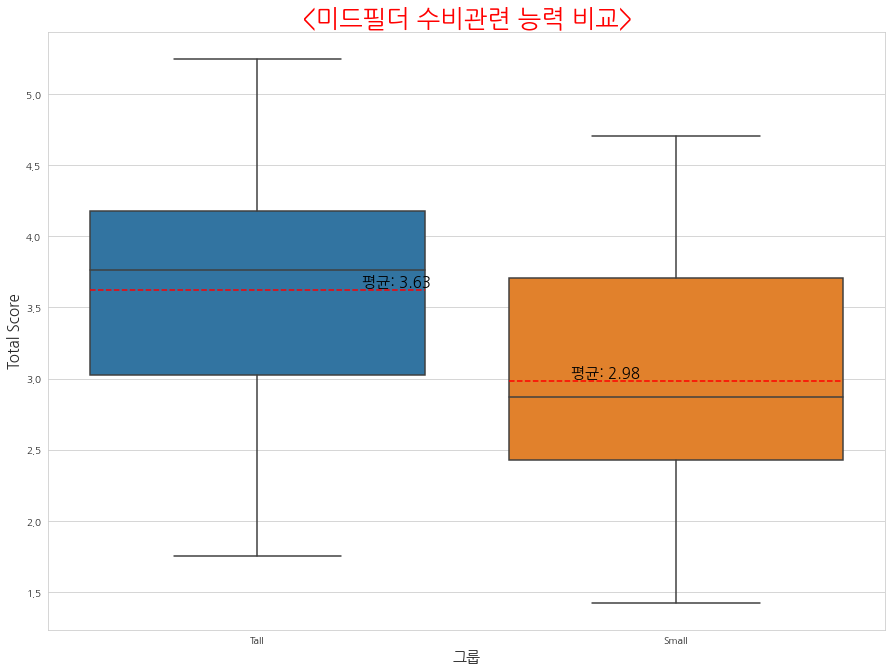

In [23]:
plt.rcParams['font.family'] = 'Nanum Gothic'

plt.figure(figsize=(15, 11))
sns.boxplot(x='group', y='total_score', data=sorted_df)
plt.title('<미드필더 수비관련 능력 비교>', fontsize=25, color="red")
plt.xlabel('그룹', fontsize=15)
plt.ylabel('Total Score', fontsize=15)

small_mean = sorted_df[sorted_df['group'] == 'Small']['total_score'].mean()
tall_mean = sorted_df[sorted_df['group'] == 'Tall']['total_score'].mean()

plt.axhline(tall_mean, color='red', linestyle='--', xmin=0.05, xmax=0.45)
plt.axhline(small_mean, color='red', linestyle='--', xmin=0.55, xmax=0.95)
plt.text(0.25, tall_mean, f'평균: {tall_mean:.2f}', verticalalignment='bottom', fontsize=15, color='black')
plt.text(0.75, small_mean, f'평균: {small_mean:.2f}', verticalalignment='bottom', fontsize=15, color='black')

plt.show()

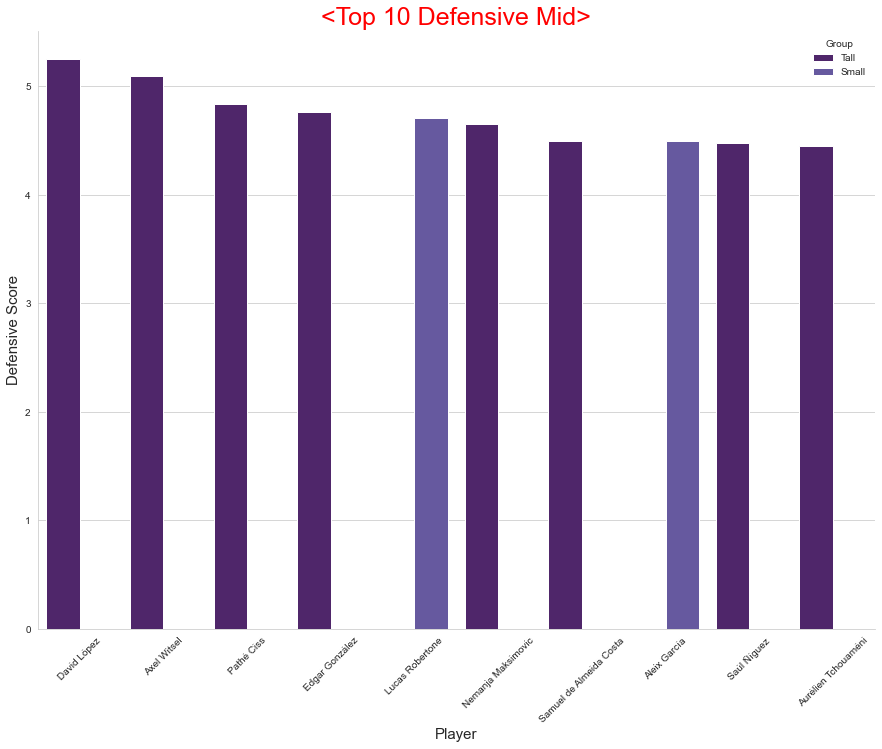

In [24]:
top10_defensive_mid_scores = sorted_df.sort_values(by='total_score', ascending=False).head(10)
plt.rcParams['font.family'] = 'Arial'

sns.set_style("whitegrid")
palette = sns.color_palette("twilight_shifted", len(top10_defensive_mid_scores))

plt.figure(figsize=(15, 11))
barplot = sns.barplot(x='name', y='total_score', hue='group', data=top10_defensive_mid_scores, palette=palette)

plt.legend(title='Group', loc='upper right', frameon=False)

plt.title('<Top 10 Defensive Mid>', fontsize=25, color='red')
plt.xlabel('Player', fontsize=15)
plt.ylabel('Defensive Score', fontsize=15)

plt.xticks(rotation=45)
sns.despine()

plt.show()

### 다비드 로페스 (15경기 2골) - 지로나 FC
#### Group Tall
#### Score : 5.247304
![asdf](./image/david.jpeg)

# Defender

## 가설 3 : 수비수는 키가 큰 그룹이 더 뛰어난 선수가 많을 것이다. 
- time_per_total_clearances(추가)
- time_per_interceptions(추가)
- tackles_success_rate(추가)
- aerial_duels_rate(추가)
- ground_duels_rate(추가)
- time_per_recoveries(추가)
- time_per_blocks(추가)

![def](defender_stat.jpeg)

## 일반적으로 수비수를 비교할때 비교지표 (출처 : ESPN)

In [25]:
from sklearn.preprocessing import MinMaxScaler

Small = df[(df['height'] <= 182) & (df['time_played'] >= 90) & (df['position'] == 'Defender') & (df['total_tackles'] >= 10)&(df['aerial_duels'] >= 10)&(df['ground_duels'] >= 10)]
Tall = df[(df['height'] > 182) & (df['time_played'] >= 90) & (df['position'] == 'Defender') & (df['total_tackles'] >= 10)&(df['aerial_duels'] >= 10)&(df['ground_duels'] >= 10)]

combined_grouped = pd.concat([Tall, Small], keys=['Tall', 'Small']).reset_index()

columns_to_scale = ['time_per_total_clearances', 
                    'time_per_interceptions', 
                    'tackles_success_rate', 
                    'aerial_duels_rate', 
                    'ground_duels_rate', 
                    'time_per_recoveries',
                    'time_per_blocks',
                   ]

names = combined_grouped['name']
groups = combined_grouped['level_0']

selected_df = combined_grouped[columns_to_scale]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_df)

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['total_score'] = scaled_df.sum(axis=1)
scaled_df['name'] = names
scaled_df['group'] = groups

sorted_df = scaled_df.sort_values(by='total_score', ascending=False)

column_order = ['group', 'name'] + [col for col in sorted_df.columns if col not in ['group', 'name']]
sorted_df = sorted_df[column_order]

sorted_df.head()

group           name  time_per_total_clearances  time_per_interceptions  \
4   Tall  Carl Starfelt                   0.963933                0.545805   
37  Tall   Sergio Ramos                   0.694947                0.773471   
19  Tall   Jorge Cuenca                   0.784900                0.439656   
23  Tall     Kike Salas                   0.843213                0.850883   
38  Tall   Stefan Savic                   0.322743                1.000000   

    tackles_success_rate  aerial_duels_rate  ground_duels_rate  \
4               0.899209           0.763445           0.774667   
37              0.869565           0.706269           0.479297   
19              0.791304           0.849871           0.753049   
23              0.869565           0.831395           0.247713   
38              0.739130           0.755814           0.396341   

    time_per_recoveries  time_per_blocks  total_score  
4              0.596105         0.898848     5.442013  
37             0.677565         0.794396     4.995511  
19             0.118291         0.886387     4.623457  
23             0.612892         0.310165     4.565828  
38             0.411033         0.892884     4.517946

In [26]:
group_counts = sorted_df['group'].value_counts().reset_index()
group_counts.columns = ['Group', 'Count']


colors = ['gold', 'lightgreen']

fig = px.pie(group_counts, values='Count', names='Group', title='<수비수들의 그룹간 비율>',
             color_discrete_sequence=colors, hole=0.3)


fig.update_traces(textinfo='percent+label', textfont_size=20)
fig.update_traces(pull=[0.1, 0, 0, 0])
fig.update_layout(title_font_size=25, title_x=0.5)
fig.update_layout(plot_bgcolor='white', paper_bgcolor='lightgrey')

fig.show()

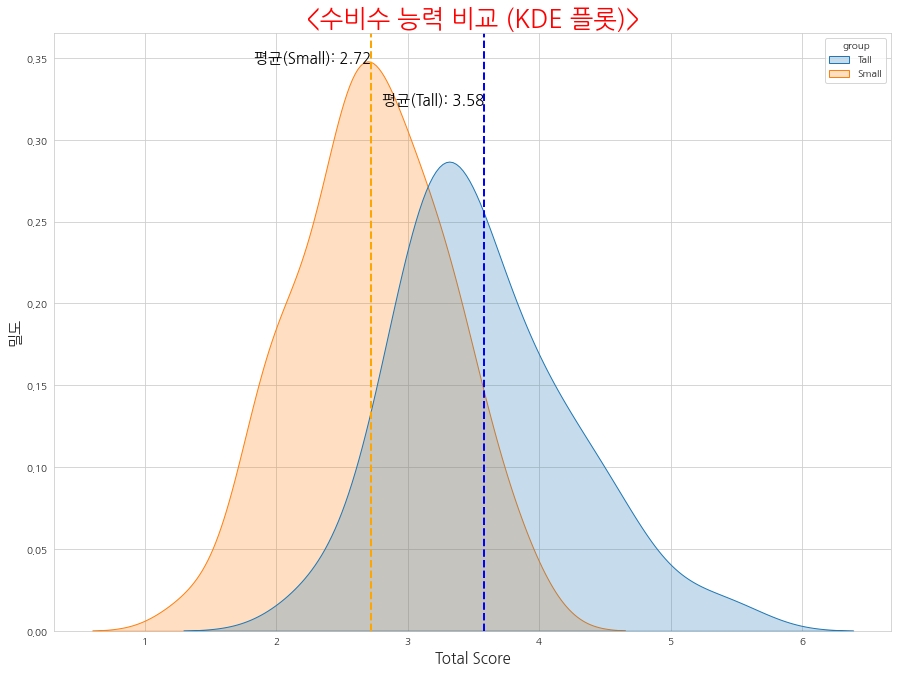

In [27]:
plt.rcParams['font.family'] = 'Nanum Gothic'

plt.figure(figsize=(15, 11))
sns.kdeplot(data=sorted_df, x='total_score', hue='group', fill=True)
plt.title('<수비수 능력 비교 (KDE 플롯)>', fontsize=25, color='red')
plt.xlabel('Total Score', fontsize=15)
plt.ylabel('밀도', fontsize=15)

small_mean = sorted_df[sorted_df['group'] == 'Small']['total_score'].mean()
tall_mean = sorted_df[sorted_df['group'] == 'Tall']['total_score'].mean()

plt.axvline(small_mean, color='orange', linestyle='--', linewidth=2)
plt.axvline(tall_mean, color='blue', linestyle='--', linewidth=2)
plt.text(small_mean, plt.ylim()[1]*0.95, f'평균(Small): {small_mean:.2f}', horizontalalignment='right', fontsize=15, color='black')
plt.text(tall_mean, plt.ylim()[1]*0.88, f'평균(Tall): {tall_mean:.2f}', horizontalalignment='right', fontsize=15, color='black')

plt.show()

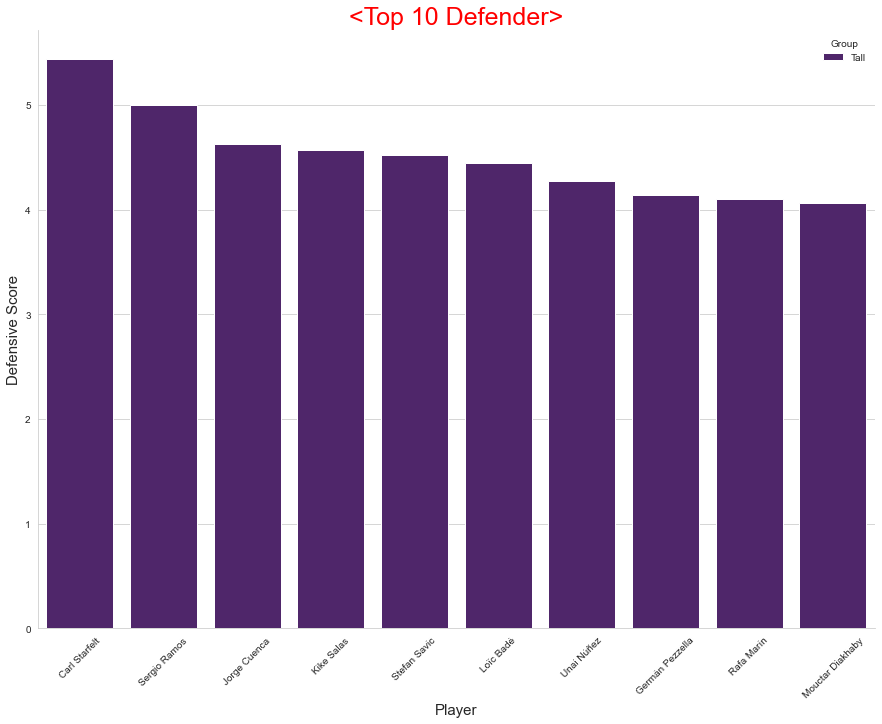

In [28]:
top10_defender = sorted_df.sort_values(by='total_score', ascending=False).head(10)
plt.rcParams['font.family'] = 'Arial'

sns.set_style("whitegrid")
palette = sns.color_palette("twilight_shifted", len(top10_defender))

plt.figure(figsize=(15, 11))
barplot = sns.barplot(x='name', y='total_score', hue='group', data=top10_defender, palette=palette)

plt.legend(title='Group', loc='upper right', frameon=False)

plt.title('<Top 10 Defender>', fontsize=25, color='red')
plt.xlabel('Player', fontsize=15)
plt.ylabel('Defensive Score', fontsize=15)

plt.xticks(rotation=45)
sns.despine()

plt.show()

### 칼 스타펠트 (16경기 1골) - RC 셀타 비고
#### Group Tall
#### Score : 5.442013

![asdf](./image/carl.jpeg)

## 가설 3-1 : 수비수는 키가 클 수록 공중볼 경합 및 태클성공률이 높을 것이다.

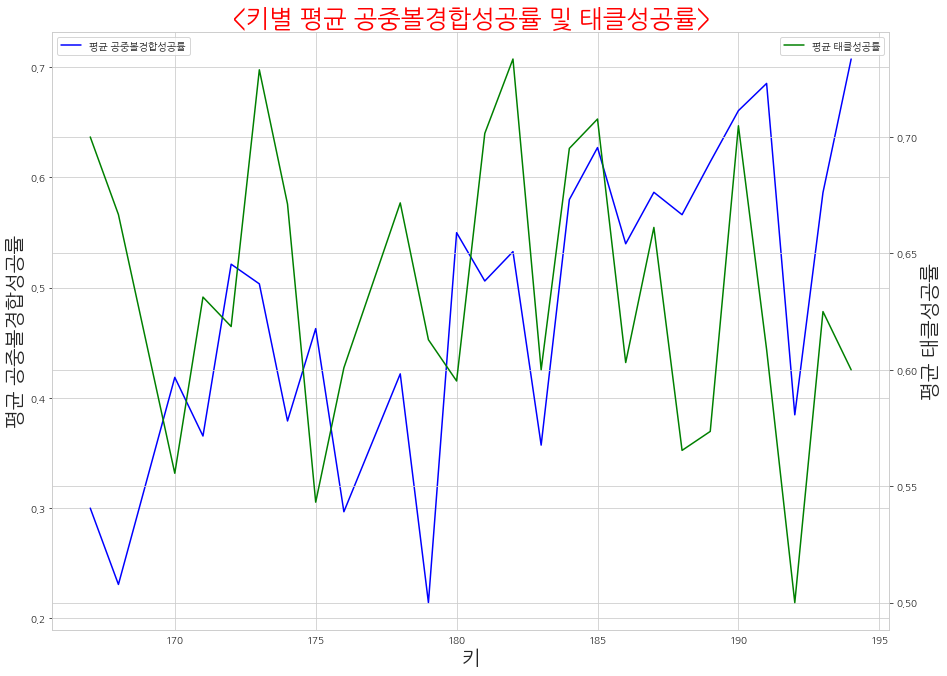

In [29]:
plt.rcParams['font.family'] = 'Nanum Gothic'

# 데이터
height_mean_aerial = combined_grouped.groupby('height')['aerial_duels_rate'].mean().reset_index()
height_mean_tackles = combined_grouped.groupby('height')['tackles_success_rate'].mean().reset_index()

plt.figure(figsize=(15, 11))

ax1 = sns.lineplot(data=height_mean_aerial, x='height', y='aerial_duels_rate', color='blue', label='평균 공중볼경합성공률')
plt.ylabel('평균 공중볼경합성공률', fontsize=20)

ax2 = ax1.twinx()
sns.lineplot(data=height_mean_tackles, x='height', y='tackles_success_rate', color='green', label='평균 태클성공률')
plt.ylabel('평균 태클성공률', fontsize=20)

plt.title('<키별 평균 공중볼경합성공률 및 태클성공률>', fontsize=25, color='red')
ax1.set_xlabel('키' , fontsize=20)
ax1.grid(True)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## 가설 3-2 : 파울빈도가 높을수록 수비능력은 좋지 않을 것이다.

- total_fouls_conceded
- total_red_cards
- yellow_cards

In [30]:
Small = df[(df['height'] <= 182) & (df['time_played'] >= 90) & (df['position'] == 'Defender') & (df['total_tackles'] >= 10)&(df['aerial_duels'] >= 10)&(df['ground_duels'] >= 10)]
Tall = df[(df['height'] > 182) & (df['time_played'] >= 90) & (df['position'] == 'Defender') & (df['total_tackles'] >= 10)&(df['aerial_duels'] >= 10)&(df['ground_duels'] >= 10)]

combined_grouped = pd.concat([Tall, Small], keys=['Tall', 'Small']).reset_index()

columns_to_scale = ['time_per_total_clearances', 
                    'time_per_interceptions', 
                    'tackles_success_rate', 
                    'aerial_duels_rate', 
                    'ground_duels_rate', 
                    'time_per_recoveries',
                    'time_per_blocks',
                   ]

names = combined_grouped['name']
groups = combined_grouped['level_0']

selected_df = combined_grouped[columns_to_scale]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_df)

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['total_score'] = scaled_df.sum(axis=1)
scaled_df['name'] = names
scaled_df['group'] = groups

sorted_df = scaled_df.sort_values(by='total_score', ascending=False)

In [31]:
columns_to_scale2 = ['total_fouls_conceded', 'total_red_cards', 'yellow_cards']

names = combined_grouped['name']
groups = combined_grouped['level_0']

selected_df2 = combined_grouped[columns_to_scale2]
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(selected_df2)

scaled_df2 = pd.DataFrame(scaled_data2, columns=columns_to_scale2)
scaled_df2['total_score'] = scaled_df2.sum(axis=1)
scaled_df2['name'] = names
scaled_df2['group'] = groups

sorted_df2 = scaled_df2.sort_values(by='total_score', ascending=False)

In [32]:
# 두 데이터프레임 병합
merged_df = pd.merge(sorted_df[['name', 'total_score']], sorted_df2[['name', 'total_score']], on='name', suffixes=('_df1', '_df2'))

fig = px.scatter(merged_df, x='total_score_df1', y='total_score_df2', hover_data=['name'],
                 color='total_score_df1',
                 size='total_score_df2',
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    title='<수비스탯과 파울빈도의 상관관계>',
    xaxis_title='수비스탯',
    yaxis_title='파울빈도',
    hovermode='closest',
    plot_bgcolor='white', 
    xaxis=dict(showline=True, showgrid=False, linecolor='black'),
    yaxis=dict(showline=True, showgrid=False, linecolor='black'), 
    font=dict(family="Arial, sans-serif", size=12, color="black")
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

# Goalkeeper
## 가설 4 : 골키퍼는 키가 큰 선수들이 더 좋은 활약을 펼칠 것이다.

![small_gk](./image/small_gk.png)

## -> 게임에서도 많은 논쟁

![bj](./image/bj.png)
(자료 출처 :https://www.footballist.co.kr/news/articleView.html?idxno=13674)

## -> 골키퍼는 190cm이하는 키가 작은 그룹, 이상은 키가 큰 그룹으로 분류

## 골키퍼 스탯 분석
- successful_gk_pass_rate(추가)
- saves_from_penalty
- match_per_saves_made(추가)
- match_per_goal_conceded(추가)

In [6]:
# 피처 추가
df['successful_gk_pass_rate'] = df['gk_successful_distribution'] / df['gk_successful_distribution'] + df['gk_unsuccessful_distribution']
df['match_per_saves_made'] = df['saves_made'] / df['games_played']
df['match_per_goal_conceded'] = (df['goals_conceded'] / df['games_played'])

In [34]:
Small = df[(df['height'] <= 190) & (df['games_played'] >= 5) & (df['position'] == 'Goalkeeper')]
Tall = df[(df['height'] > 190) & (df['games_played'] >= 5) & (df['position'] == 'Goalkeeper')]

combined_grouped = pd.concat([Tall, Small], keys=['Tall', 'Small']).reset_index()

columns_to_scale = ['successful_gk_pass_rate',  
                    'saves_from_penalty', 
                    'match_per_saves_made',
                    'match_per_goal_conceded'
                   ]
names = combined_grouped['name']
groups = combined_grouped['level_0']

selected_df = combined_grouped[columns_to_scale]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_df)

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['total_score'] = scaled_df.sum(axis=1)
scaled_df['total_score'] = scaled_df['total_score'] - scaled_df['match_per_goal_conceded']
scaled_df['name'] = names
scaled_df['group'] = groups

sorted_df = scaled_df.sort_values(by='total_score', ascending=False)

column_order = ['group', 'name'] + [col for col in sorted_df.columns if col not in ['group', 'name']]
sorted_df = sorted_df[column_order]

sorted_df.head()

group                name  successful_gk_pass_rate  saves_from_penalty  \
13  Small       Conan Ledesma                 0.985075                 NaN   
21  Small  Stole Dimitrievski                 0.970149                 0.0   
14  Small     Filip Jørgensen                 0.432836                 NaN   
2    Tall         David Soria                 0.955224                 NaN   
22  Small          Unai Simón                 0.940299                 0.0   

    match_per_saves_made  match_per_goal_conceded  total_score  
13              0.688302                 0.549708     1.673377  
21              0.577358                 0.467836     1.547508  
14              1.000000                 0.843080     1.432836  
2               0.418868                 0.433723     1.374092  
22              0.418868                 0.297271     1.359166

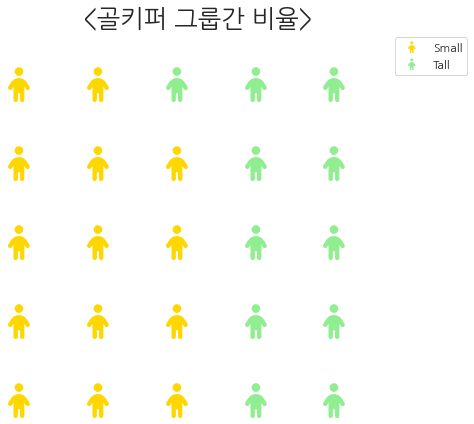

In [35]:
from pywaffle import Waffle

group_counts = sorted_df['group'].value_counts().reset_index()
group_counts.columns = ['Group', 'Count']

data = {row['Group']: row['Count'] for index, row in group_counts.iterrows()}

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(10, 6),
    rows=5,  
    columns=5,
    values=data, 
    colors=colors,  
    title={'label': '<골키퍼 그룹간 비율>', 'loc': 'center', 'fontsize': 25},
    icons='child',  
    font_size=35,  
    icon_legend=True, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 12}
)

plt.show()

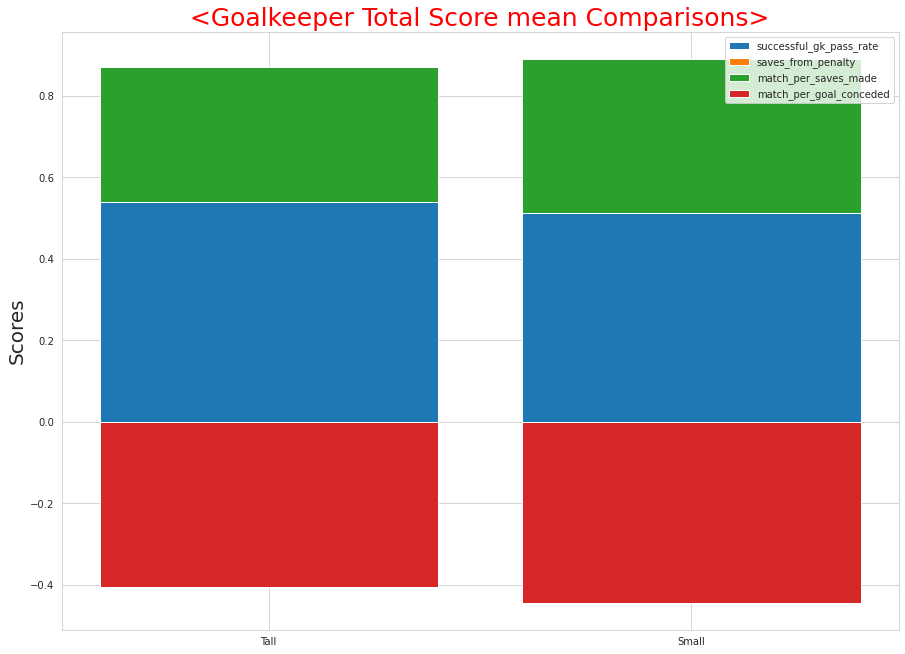

In [17]:
plt.rcParams['font.family'] = 'Aerial'

grouped_data = sorted_df.groupby('group')[columns_to_scale].mean().reindex(['Tall', 'Small'])

cumulative_data = grouped_data.cumsum(axis=1)
last_column = cumulative_data.columns[-1]

fig, ax = plt.subplots(figsize=(15, 11))

for i, column in enumerate(grouped_data.columns):
    if column == 'match_per_goal_conceded':
        ax.bar(grouped_data.index, -grouped_data[column], 
               label=column)
    else:
        ax.bar(grouped_data.index, grouped_data[column], 
               bottom=cumulative_data[column] - grouped_data[column] if i != 0 else 0,
               label=column)

ax.set_ylabel('Scores', fontsize=20)
ax.set_title('<Goalkeeper Total Score mean Comparisons>', fontsize=25, color='red')
ax.legend()

plt.show()

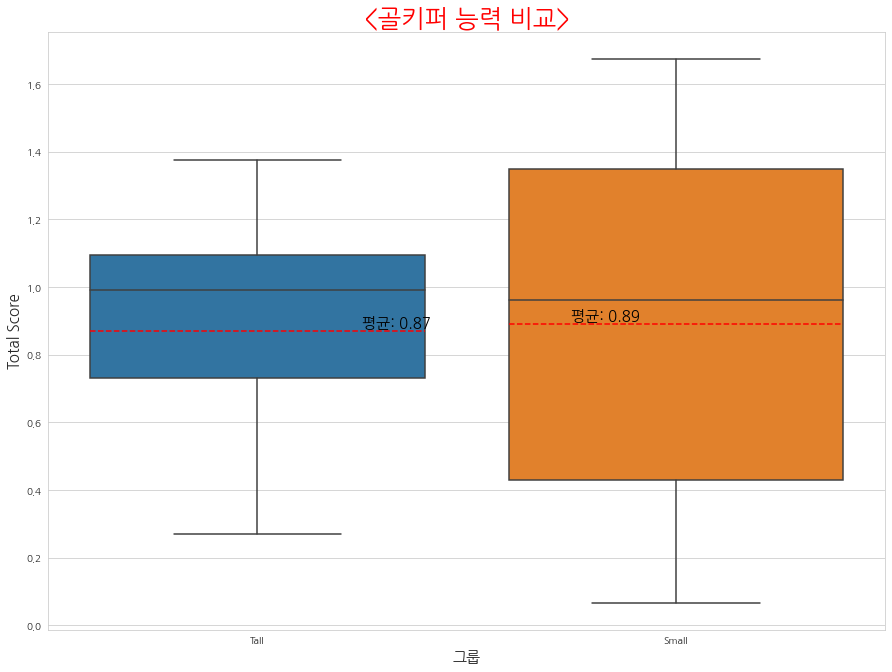

In [40]:
plt.rcParams['font.family'] = 'Nanum Gothic'

plt.figure(figsize=(15, 11))
sns.boxplot(x='group', y='total_score', data=sorted_df, order=['Tall', 'Small'])
plt.title('<골키퍼 능력 비교>', fontsize="25", color='red')
plt.xlabel('그룹', fontsize="15")
plt.ylabel('Total Score', fontsize="15")

small_mean = sorted_df[sorted_df['group'] == 'Small']['total_score'].mean()
tall_mean = sorted_df[sorted_df['group'] == 'Tall']['total_score'].mean()

plt.axhline(small_mean, color='red', linestyle='--', xmin=0.55, xmax=0.95)
plt.axhline(tall_mean, color='red', linestyle='--', xmin=0.05, xmax=0.45)

plt.text(0.25, tall_mean, f'평균: {tall_mean:.2f}', verticalalignment='bottom', fontsize=15, color='black')
plt.text(0.75, small_mean, f'평균: {small_mean:.2f}', verticalalignment='bottom', fontsize=15, color='black')

plt.show()

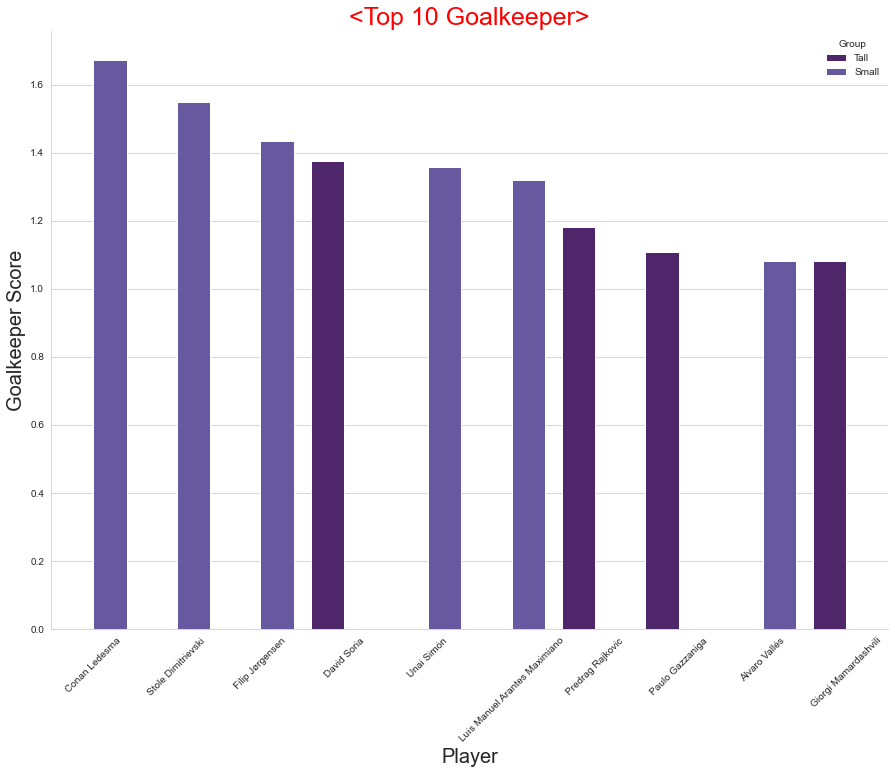

In [12]:
top10_goalkeeper = sorted_df.sort_values(by='total_score', ascending=False).head(10)
plt.rcParams['font.family'] = 'Arial'

sns.set_style("whitegrid")
palette = sns.color_palette("twilight_shifted", len(top10_goalkeeper))

hue_order = ['Tall', 'Small']

plt.figure(figsize=(15, 11))
barplot = sns.barplot(x='name', y='total_score', hue='group', data=top10_goalkeeper, palette=palette, hue_order=hue_order)

plt.legend(title='Group', loc='upper right', frameon=False)

plt.title('<Top 10 Goalkeeper>', fontsize=25, color='red')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Goalkeeper Score', fontsize=20)

plt.xticks(rotation=45)
sns.despine()

plt.show()

### 코난 레데스마 (16경기 24실점 2클린시트 72.1%선방률) - 카디즈 CF
#### Group Small
#### Score : 1.673377
![led](./image/lede.jpeg)

# ETC
## 가설 5 : 평균 신장이 높은 팀이 세트피스에서 더 강한 모습을 보일 것이다.

In [7]:
set_piece = df.groupby('team')[['headed_goals']+['goals']].sum()
set_piece["headed_goals_per_goals"] = set_piece['headed_goals']/set_piece['goals']
avg_height = df.groupby('team')["height"].mean().sort_values(ascending=False).reset_index()
top_20_teams = pd.merge(set_piece, avg_height, on='team')
top_20_teams

team  headed_goals  goals  headed_goals_per_goals  \
0        Athletic Club           6.0   33.0                0.181818   
1   Atlético de Madrid           6.0   36.0                0.166667   
2           CA Osasuna           5.0   21.0                0.238095   
3             Cádiz CF           5.0   14.0                0.357143   
4     Deportivo Alavés           2.0   11.0                0.181818   
5         FC Barcelona           6.0   32.0                0.187500   
6            Getafe CF          11.0   24.0                0.458333   
7            Girona FC           7.0   42.0                0.166667   
8           Granada CF           1.0   17.0                0.058824   
9             RC Celta           3.0   17.0                0.176471   
10        RCD Mallorca           5.0   17.0                0.294118   
11      Rayo Vallecano           0.0   16.0                0.000000   
12          Real Betis           2.0   20.0                0.100000   
13         Real Madrid           8.0   39.0                0.205128   
14       Real Sociedad           5.0   27.0                0.185185   
15          Sevilla FC           6.0   21.0                0.285714   
16          UD Almería           1.0   19.0                0.052632   
17       UD Las Palmas           1.0   15.0                0.066667   
18         Valencia CF           3.0   19.0                0.157895   
19       Villarreal CF           4.0   26.0                0.153846   

        height  
0   182.629630  
1   181.466667  
2   182.769231  
3   181.482759  
4   183.206897  
5   181.093750  
6   183.785714  
7   181.740741  
8   181.892857  
9   181.750000  
10  182.560000  
11  180.000000  
12  182.129032  
13  181.406250  
14  182.100000  
15  183.470588  
16  182.300000  
17  179.714286  
18  182.586207  
19  181.875000

In [8]:
# 상관계수 계산
corr_value = np.corrcoef(top_20_teams['height'], top_20_teams['headed_goals_per_goals'])[0][1]

fig = px.scatter(top_20_teams, x='height', y='headed_goals_per_goals', 
                 text='team', size='headed_goals_per_goals', 
                 hover_data=['team'], title='Team - Headed Goals Percentage')

fig.add_traces(px.scatter(top_20_teams, x='height', y='headed_goals_per_goals', 
                          trendline='ols').data[1])

fig.update_layout(title=f'<팀별 헤딩골 비율><br>상관계수: {corr_value:.2f}')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title_font_size=25, xaxis_title='신장', yaxis_title='헤딩골 비율')

fig.show()

## 가설 6 : 평균 신장이 높은 팀이 순위가 더 높을 것이다.

In [9]:
rankings = {
    'Real Madrid': 1,
    'Girona FC': 2,
    'FC Barcelona': 3,
    'Athletic Club': 4,
    'Atlético de Madrid' : 5,
    'Real Sociedad' : 6,
    'Real Betis' : 7,
    'Getafe CF' : 8,
    'Valencia CF' : 9,
    'UD Las Palmas' : 10,
    'Rayo Vallecano' : 11,
    'CA Osasuna' : 12,
    'Villarreal CF' : 13,
    'RCD Mallorca' : 14,
    'Deportivo Alavés' : 15,
    'Sevilla FC' : 16,
    'RC Celta' : 17,
    'Cádiz CF' : 18,
    'Granada CF' : 19,
    'UD Almería' : 20
}

df['rankings']= df['team'].map(rankings)

/Users/jinwon/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 225 missing from current font.

/Users/jinwon/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 237 missing from current font.

/Users/jinwon/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 225 missing from current font.

/Users/jinwon/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 237 missing from current font.



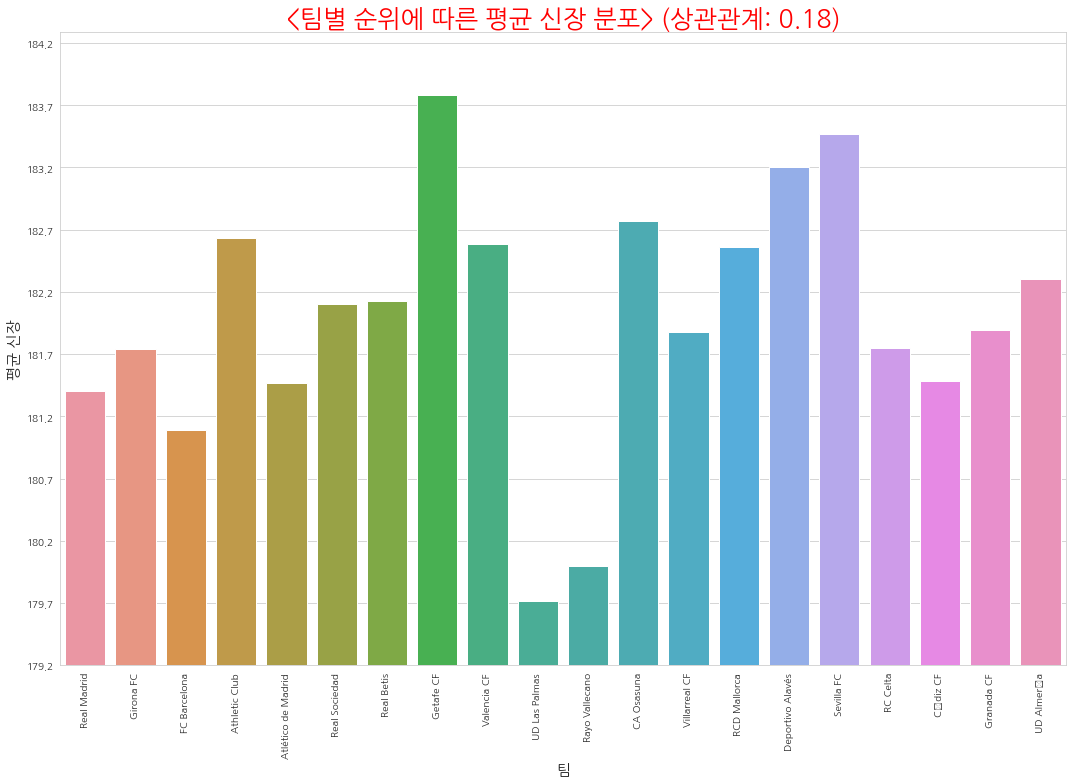

In [42]:
avg_height = df.groupby('team')["height"].mean().sort_values(ascending=False).reset_index()
rankings = df.groupby('team')["rankings"].first()
merged_df = pd.merge(rankings, avg_height, on='team')

plt.rcParams['font.family'] = 'Nanum Gothic'

plt.figure(figsize=(15, 11))

sns.barplot(x='team', y='height', data=merged_df.sort_values(by='rankings', ascending=True).head(20))

corr_value = np.corrcoef(merged_df['height'], merged_df['rankings'])[0][1]

plt.xlabel('팀', fontsize=15)
plt.ylabel('평균 신장', fontsize=15)
plt.title(f'<팀별 순위에 따른 평균 신장 분포> (상관관계: {corr_value:.2f})', fontsize=25, color='red')
plt.xticks(rotation=90)
plt.ylim(merged_df['height'].min() - 0.5, merged_df['height'].max() + 0.5)
plt.yticks(np.arange(round(merged_df['height'].min(), 1) - 0.5, 
                     round(merged_df['height'].max(), 1) + 0.5, 0.5))

plt.tight_layout()
plt.show()

## 가설 7 : 평균 연령이 낮은 팀이 순위가 더 높을 것이다.

In [10]:
# 피처 추가

team_locations = {
    "Real Betis": (37.35658957227396, -5.981676842535544),
    "UD Las Palmas": (28.100586051465935, -15.456561827627564),
    "Deportivo Alavés": (42.837246308146085, -2.6881506832938613),
    "Rayo Vallecano": (40.392225398904685, -3.6585036543234337),
    "RCD Mallorca": (39.590100793795834, 2.6302967609992005),
    "Villarreal CF": (39.94399270313835, -0.10298789851664428),
    "Sevilla FC": (37.384180371301646, -5.970488271601671),
    "UD Almería": (36.84019014126773, -2.4354022157963344),
    "Granada CF": (37.153099080535355, -3.595341680318258),
    "Atlético de Madrid": (40.436415965955625, -3.5994268082881975),
    "RC Celta": (42.2120074823353, -8.739611256125011),
    "Real Sociedad": (43.30153758481213, -1.9735945814824396),
    "Athletic Club": (43.26431120053988, -2.949384517472862),
    "CA Osasuna": (42.79680253087235, -1.6370989444696595),
    "Real Madrid": (40.45317745893846, -3.688215685011142),
    "Valencia CF": (39.47477979627044, -0.3585472868911522),
    "FC Barcelona": (41.36484469742273, 2.155734770833648),
    "Girona FC": (41.96135773287146, 2.828516945201737),
    "Getafe CF": (40.32592997739142, -3.7149009445401573),
    "Cádiz CF": (36.50274758289455, -6.2729714176580424)
}

df['Latitude'] = df['team'].map(lambda x: team_locations[x][0])
df['Longitude'] = df['team'].map(lambda x: team_locations[x][1])

In [13]:
# 피처 추가
from datetime import datetime

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
current_date = datetime.now()

def calculate_age(birthdate, current_date):
    age = current_date.year - birthdate.year - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))
    return age

df['age'] = df['date_of_birth'].apply(lambda x: calculate_age(x, current_date))

In [14]:
import folium
from folium import plugins

team_avg_age = df.groupby('team')['age'].mean().reset_index()

team_location = df.groupby("team").agg({"Latitude": "mean", "Longitude": "mean"})
team_data = team_location.join(team_avg_age.set_index('team'))
team_rankings = df.groupby('team')['rankings'].mean().reset_index()
team_data = team_data.join(team_rankings.set_index('team'))

map_center = [team_data['Latitude'].mean(), team_data['Longitude'].mean()]

map = folium.Map(location=map_center, zoom_start=5)

for team, row in team_data.iterrows():
    age_value = row['age']
    ranking_value = row['rankings']

    if age_value <= 25:
        icon_color = 'lightgreen'
    elif 25 < age_value <= 28:
        icon_color = 'blue'
    elif 28 < age_value <= 31:
        icon_color = 'orange'
    else:
        icon_color = 'red'

    icon = plugins.BeautifyIcon(
        border_color='transparent',
        text_color='white', 
        number=int(ranking_value),
        background_color=icon_color,
        inner_icon_style='margin-top:0;')

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        radius=100,
        icon=icon,
        popup=f"{team}: 순위 {ranking_value:.2f}, 평균연령 {age_value:.2f}"
    ).add_to(map)

map

## 가설 8 : 좋은걸 많이 먹고 크는 요즘 선수들이 더 키가 클 것이다. (번외)

In [15]:
import plotly.graph_objs as go

df['birth_year'] = pd.to_datetime(df['date_of_birth']).dt.year
yearly_height = df[df['birth_year'] >= 1985].groupby('birth_year')['height'].mean().reset_index()
yearly_count = df[df['birth_year'] >= 1985].groupby('birth_year')['name'].count().reset_index()

yearly_data = pd.merge(yearly_height, yearly_count, on='birth_year')

fig = go.Figure()
fig.add_trace(go.Scatter(x=yearly_data['birth_year'], y=yearly_data['height'], 
                    mode='lines', name='평균 키',
                    line=dict(color='blue')))
fig.add_trace(go.Scatter(x=yearly_data['birth_year'], y=yearly_data['name'], 
                    mode='lines', name='선수 수',
                    line=dict(color='red'), yaxis='y2'))

fig.add_vrect(x0="1994", x1="2004", fillcolor="mintcream", opacity=0.5, layer="below", line_width=0)

fig.update_layout(
    title='<년도별 선수들의 평균 키와 선수 수 (1985년 이후)>',
    xaxis=dict(title='년도'),
    yaxis=dict(title='평균 키 (cm)'),
    yaxis2=dict(title='선수 수', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.1, orientation='h')
)

fig.show()

# 데이터분석을 토대로 뽑아본 현시점까지의 23/24시즌 라리가 베스트11
### Tall : 8명, Small : 3명

![new](./image/best.png)



## -> 위 데이터 시각화 결론으로 봤을 때, 키가 큰 그룹이 확실히 평균적으로 높은 수치를 기록했다. 특히 수비수부문에서! But...



# 한준희 해설위원님의 현시점까지의 23/24시즌 라리가 베스트11
![old](./image/best11.png)

# -> 적중률 : 0%
# -> 축구는 단순히 지표만으로 평가할 수 없다는 결론!